# This notebook contains

# Importing libraries and data

# Data cleaning

# Data prep for regression analysis

# Regression analysis

# Bonus: Performance improvement after removing outliers

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
#Defining path
path = r'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A6 Advanced Analytics Vancouver'

In [5]:
#double checking path
path

'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A6 Advanced Analytics Vancouver'

In [7]:
#Creating file path and loading the data and checking
listings = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'cleaned_van_geo.csv'))
listings.head()

,Unnamed: 0,id,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,availability_365,calculated_host_listings_count
0,0,13188,Riley Park,49.247730,-123.105090,Entire home/apt,150.0,283,0,1
1,1,13221,Riley Park,49.254890,-123.097080,Entire home/apt,120.0,15,363,1
2,2,13358,Downtown,49.281174,-123.125931,Entire home/apt,165.0,493,0,1
3,3,13490,Kensington-Cedar Cottage,49.256220,-123.066070,Entire home/apt,150.0,101,92,1
4,4,14267,Kensington-Cedar Cottage,49.249220,-123.081390,Entire home/apt,150.0,33,17,1


# Data Cleaning

In [8]:
#dropping some Unnamed
listings.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [9]:
# Checking
listings.shape

(6684, 9)

In [10]:
# Viewing columns
listings.head()

,id,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,availability_365,calculated_host_listings_count
0,13188,Riley Park,49.247730,-123.105090,Entire home/apt,150.0,283,0,1
1,13221,Riley Park,49.254890,-123.097080,Entire home/apt,120.0,15,363,1
2,13358,Downtown,49.281174,-123.125931,Entire home/apt,165.0,493,0,1
3,13490,Kensington-Cedar Cottage,49.256220,-123.066070,Entire home/apt,150.0,101,92,1
4,14267,Kensington-Cedar Cottage,49.249220,-123.081390,Entire home/apt,150.0,33,17,1


In [11]:
listings.columns

Index(['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'number_of_reviews', 'availability_365',
       'calculated_host_listings_count'],
      dtype='object')

In [13]:
# Check for missing values
listings.isnull().sum()

id                                0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
number_of_reviews                 0
availability_365                  0
calculated_host_listings_count    0
dtype: int64

In [14]:
dups = listings.duplicated()

# no missing values
# no duplicates

/var/folders/n8/7047v_m52_s6rgl3299kyhgc0000gn/T/ipykernel_49050/4256950940.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(listings['price'], bins=25) # Shows extreme values


<Axes: xlabel='price', ylabel='Density'>

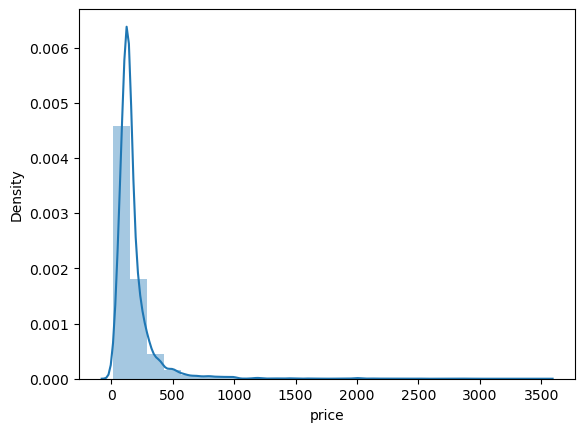

In [15]:
sns.distplot(listings['price'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [17]:
#checking the mean, median, and max
listings['price'].mean()


180.15604428485938

In [18]:
listings['price'].median()

139.0

In [19]:
listings['price'].max()

3500.0

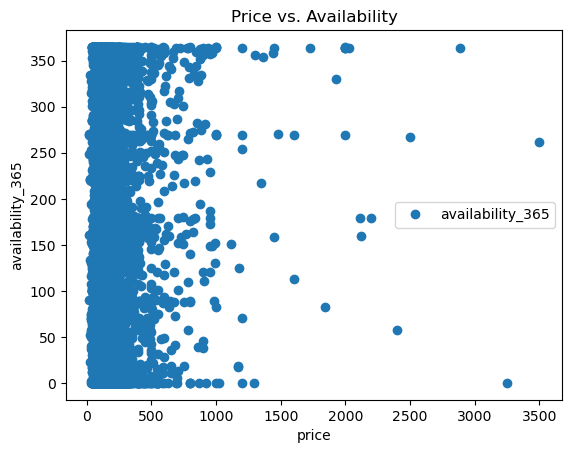

In [23]:
# Data Prep for Regression Analysis
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

listings.plot(x = 'price', y='availability_365',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price vs. Availability')  
plt.xlabel('price')  
plt.ylabel('availability_365')  
plt.show()

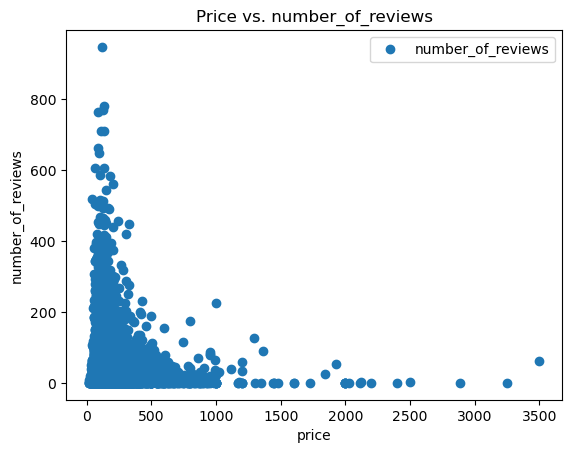

In [24]:
# Data Prep for Regression Analysis
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

listings.plot(x = 'price', y='number_of_reviews',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price vs. number_of_reviews')  
plt.xlabel('price')  
plt.ylabel('number_of_reviews')  
plt.show()

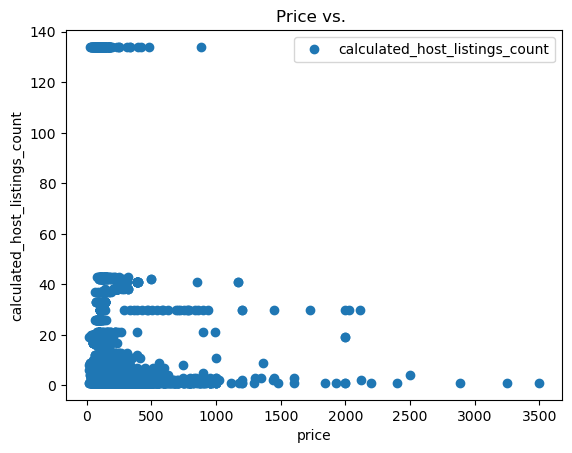

In [25]:
# Data Prep for Regression Analysis
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

listings.plot(x = 'price', y='calculated_host_listings_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price vs. ')  
plt.xlabel('price')  
plt.ylabel('calculated_host_listings_count')  
plt.show()

#Variables to include are price and average number of reviews in neighbourhoods

In [32]:
hoods_price = listings.groupby('neighbourhood')['price'].count().reset_index()

In [33]:
hoods_price

,neighbourhood,price
0,Arbutus Ridge,116
1,Downtown,1742
2,Downtown Eastside,376
3,Dunbar Southlands,207
4,Fairview,180
5,Grandview-Woodland,282
6,Hastings-Sunrise,272
7,Kensington-Cedar Cottage,405
8,Kerrisdale,78
9,Killarney,81


In [34]:
hoods_aggregated = listings.groupby('neighbourhood').agg({
    'price': 'count',          # Count of price
    'number_of_reviews': 'mean'              # Average number of reviews
}).reset_index()


In [35]:
hoods_aggregated

,neighbourhood,price,number_of_reviews
0,Arbutus Ridge,116,38.818966
1,Downtown,1742,39.576923
2,Downtown Eastside,376,57.946809
3,Dunbar Southlands,207,24.971014
4,Fairview,180,21.266667
5,Grandview-Woodland,282,60.489362
6,Hastings-Sunrise,272,49.069853
7,Kensington-Cedar Cottage,405,45.888889
8,Kerrisdale,78,25.730769
9,Killarney,81,39.604938


In [36]:
hoods_aggregated.rename(columns={'price': 'price_count', 'number_of_reviews': 'avg_no_of_reviews'}, inplace=True)

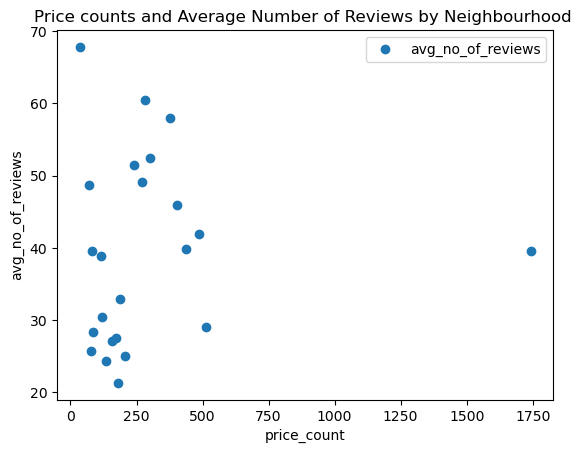

In [37]:
hoods_aggregated.plot(x = 'price_count', y='avg_no_of_reviews',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price counts and Average Number of Reviews by Neighbourhood ')  
plt.xlabel('price_count')  
plt.ylabel('avg_no_of_reviews')  
plt.show()

In [40]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = hoods_aggregated['price_count'].values.reshape(-1,1)
y = hoods_aggregated['avg_no_of_reviews'].values.reshape(-1,1)

In [41]:
X

array([[ 116],
       [1742],
       [ 376],
       [ 207],
       [ 180],
       [ 282],
       [ 272],
       [ 405],
       [  78],
       [  81],
       [ 487],
       [ 188],
       [ 437],
       [ 134],
       [ 241],
       [ 301],
       [  87],
       [  72],
       [  35],
       [ 174],
       [ 159],
       [ 512],
       [ 118]])

In [43]:
y

array([[38.81896552],
       [39.57692308],
       [57.94680851],
       [24.97101449],
       [21.26666667],
       [60.4893617 ],
       [49.06985294],
       [45.88888889],
       [25.73076923],
       [39.60493827],
       [41.85010267],
       [32.84042553],
       [39.87643021],
       [24.24626866],
       [51.46473029],
       [52.39534884],
       [28.36781609],
       [48.75      ],
       [67.85714286],
       [27.4137931 ],
       [27.02515723],
       [28.97070312],
       [30.39830508]])

In [44]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [45]:
# Create a regression object.
# This is the regression object, which will be fit onto the training set.
regression = LinearRegression() 

In [46]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

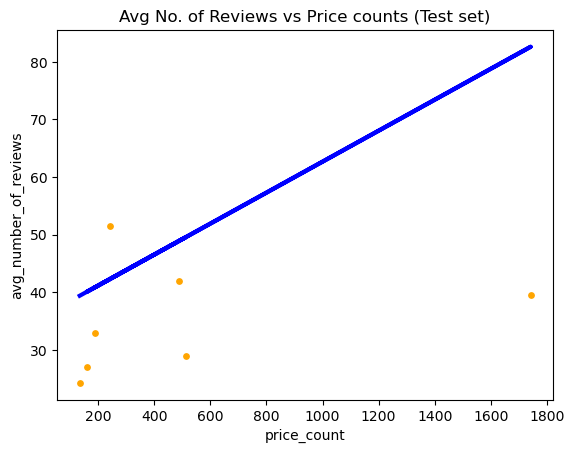

In [48]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='orange', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('Avg No. of Reviews vs Price counts (Test set)')
plot_test.xlabel('price_count')
plot_test.ylabel('avg_number_of_reviews')
plot_test.show()

The regression line is not very accurate or fit to the test set. And, subsequently, how accurate is it at predicting average number of reviews (the y variable)? It doesn't cover all the data points. For example, the prices are far from the line and indicate varied prices, which contradicts the hypothesis.So some summary statistics can further check the accuracy of the model.

Hypothesis of if host (status) or reviews increase , (depending on price and neighbourhood factors), revenue will increase  

In [49]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [50]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02689426]]
Mean squared error:  410.1209063638925
R2 score:  -4.1349390387083265


Results: A postive slope indicates as X rises, so does y. MSE is how close a regression line is to a set of points (ie. its accuracy). In this case, the MSE is large, a regression may not be the best model to represent this data.Also, the R2 score is negative which is if the model fits worse than a horizontal line.

In [51]:
y_predicted

array([[40.8198515 ],
       [48.86123667],
       [49.53359329],
       [42.24524753],
       [40.03991782],
       [82.613539  ],
       [39.3675612 ]])

In [52]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,32.840426,40.819852
1,41.850103,48.861237
2,28.970703,49.533593
3,51.464730,42.245248
4,27.025157,40.039918
5,39.576923,82.613539
6,24.246269,39.367561


By comparing the actual values from the predicted values manually using nothing but your eyes, you can see for yourself how far off or close the model is.Therefore, the model isn't doing a great job of explaining the relationship between the "price" and "number of reviews"

As a result, the hypothesis is only partially true. There's still a lot of variance in the data that can't be explained by the linear relationship between your variables. To test another hypothesis you could try multiple regression analyses. Four key points to remember when conducting any kind of predictive analysis:
    # at least 5,000 observations
    # careful about removing extreme values in order to force model to perform better
    # consider any potential bias in your data that may affect the output
    # re-test with other different predictors (x's) 

In [53]:
# Compare how the regression fits the training set 
# predict
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [54]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [55]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02689426]]
Mean squared error:  176.8001636871278
R2 score:  0.06043894258989946


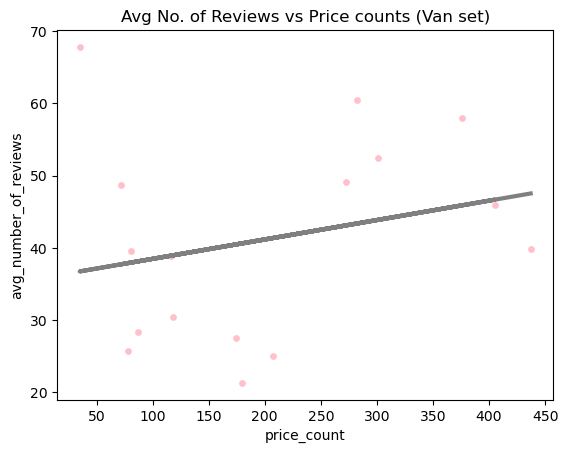

In [56]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='pink', s = 15)
plot_test.plot(X_train, y_predicted_train, color='gray', linewidth =3)
plot_test.title('Avg No. of Reviews vs Price counts (Van set)')
plot_test.xlabel('price_count')
plot_test.ylabel('avg_number_of_reviews')
plot_test.show()

The slope is relatively the same, and although the MSE has dropped in size the number is still fairly large. Also, the r2 value is now positive, however still closer to 0 indicating a poor fit.

In [57]:
# Creatin a df comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(15)

,Actual,Predicted
0,32.840426,40.819852
1,41.850103,48.861237
2,28.970703,49.533593
3,51.464730,42.245248
4,27.025157,40.039918
5,39.576923,82.613539
6,24.246269,39.367561


The model is still not doing a great job of explaining the relationship between the "price" and "number of reviews", and is therefore still a poor fit when comparing actual vs.predicted.

In [ ]:
Reflections on the impact of possible data bias include the fact that many assumptions 

In [58]:
#checking shape and df before exporting
listings.shape

(6684, 9)

In [59]:
# saving csv to folder
listings.to_csv(os.path.join(path, 'Data','Prepared Data', 'machine_learning_listings.csv'))